<a href="https://colab.research.google.com/github/Clayrisee/Kikuma/blob/main/Model_Kikuma_Improvement_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [3]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Prepare and Explore the Data

In [2]:
import os

BASE_DIR = '/content/gdrive/MyDrive/dataset/dataset_v2' # Link to the new dataset
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')

In [4]:
# Load the data
from glob import glob
train_acne_dir = glob(TRAIN_DIR+'/Acne/*.jpg')
train_chickenpox_dir = glob(TRAIN_DIR+'/Chickenpox/*.jpg')
train_melanoma_dir = glob(TRAIN_DIR+'/Melanoma/*.jpg')
train_scabies_dir = glob(TRAIN_DIR+'/Scabies/*.jpg')

In [5]:
print(f'Banyak data latih jerawat :{len(train_acne_dir)}')
print(f'Banyak data latih cacar air :{len(train_chickenpox_dir)}')
print(f'Banyak data latih melanoma :{len(train_melanoma_dir)}')
print(f'Banyak data latih skabies  :{len(train_scabies_dir)}')

Banyak data latih jerawat :700
Banyak data latih cacar air :700
Banyak data latih melanoma :710
Banyak data latih skabies  :700


In [9]:
import glob as gb
# test_acne_dir = glob(TEST_DIR+'/Acne/*.jpg')
# test_chickenpox_dir = glob(TEST_DIR+'/Chickenpox/*.jpg')
# test_melanoma_dir = glob(TEST_DIR+'/Melanoma/*.jpg')
# test_scabies_dir = glob(TEST_DIR+'/Scabies/*.jpg')

print('Test Data Directory:')
print(TEST_DIR)
print('-'*70)
for folder in os.listdir(TEST_DIR):
  files=gb.glob(pathname=str(TEST_DIR + '/' + folder + '/*.jpg'))
  print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')

Test Data Directory:
/content/gdrive/MyDrive/dataset/dataset_v2/test
----------------------------------------------------------------------
 150 gambar yang ditemukan di dalam folder Acne
 150 gambar yang ditemukan di dalam folder Chickenpox
 152 gambar yang ditemukan di dalam folder Melanoma
 150 gambar yang ditemukan di dalam folder Scabies


In [28]:
def count_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count = 0
        for name in files:
            if name.endswith(".jpg"):
              count = count + 1
        if count > 0:
          arr.append(count)
    return arr

def get_all_labels_names(dir):
  arr = []
  for root, dirs, files in os.walk(dir):
    arr.append(dirs)
    break
  return arr

4
[['Acne', 'Chickenpox', 'Melanoma', 'Scabies']]


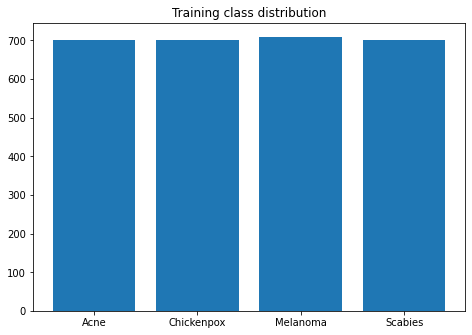

In [29]:
image_count = count_files(TRAIN_DIR)
print(len(image_count))
chars = get_all_labels_names(TRAIN_DIR)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chars[0], image_count)
plt.title("Training class distribution")
plt.show()

4
[['Acne', 'Chickenpox', 'Melanoma', 'Scabies']]


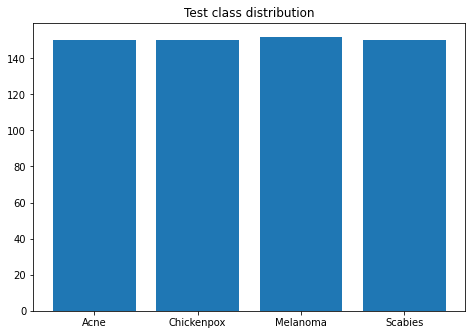

In [30]:
image_count = count_files(TEST_DIR)
print(len(image_count))
chars = get_all_labels_names(TEST_DIR)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chars[0], image_count)
plt.title("Test class distribution")
plt.show()

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[7]) 
    
  plt.show()


def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(".jpg"):
              arr.append(os.path.join(root, name))
              break
    return arr

['/content/gdrive/MyDrive/dataset/dataset_v2/train/Acne/acne-cystic-121.jpg', '/content/gdrive/MyDrive/dataset/dataset_v2/train/Chickenpox/cacar_air48.jpg', '/content/gdrive/MyDrive/dataset/dataset_v2/train/Melanoma/melanocytic-nevi-56.jpg', '/content/gdrive/MyDrive/dataset/dataset_v2/train/Scabies/rocky-mountain-spotted-fever-4.jpg']


<Figure size 432x288 with 0 Axes>

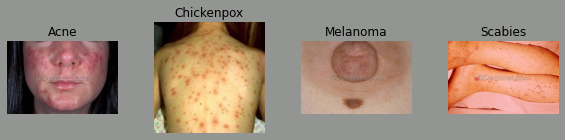

In [32]:
image_list = list_files(TRAIN_DIR)
print(image_list)
show_images(image_list)

# Pre-processing Images

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Datagen for validation set dan training set
datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range = 45,
                             zoom_range = 0.1,
                             width_shift_range=0.15, 
                             shear_range= 0.1,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )


# ImageDataGenerator for test set
test_datagen = ImageDataGenerator(validation_split=0.5, rescale=1./255)

In [35]:
# Let's try with 224, 224
IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42)

Found 2810 images belonging to 4 classes.


In [39]:
# Create validation dataset
val_set = test_datagen.flow_from_directory(TEST_DIR, 
                                        subset= 'validation',
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42
                                      )

Found 301 images belonging to 4 classes.


In [40]:
# Create test dataset
test_set = test_datagen.flow_from_directory(TEST_DIR, 
                                          subset='training',
                                          batch_size= 64, 
                                          target_size=IMG_SIZE, 
                                          class_mode='categorical')

Found 301 images belonging to 4 classes.


In [41]:
# Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_test and y_test
X_test, y_test = test_set.next()

# Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [42]:
# Print train shape and test shape

print('Train X=%s Y=%s' %(X_train.shape, y_train.shape))
print('Test X=%s Y=%s' %(X_test.shape, y_test.shape))

Train X=(64, 224, 224, 3) Y=(64, 4)
Test X=(64, 224, 224, 3) Y=(64, 4)


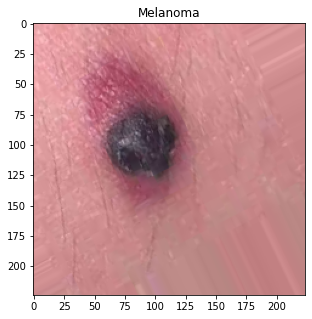

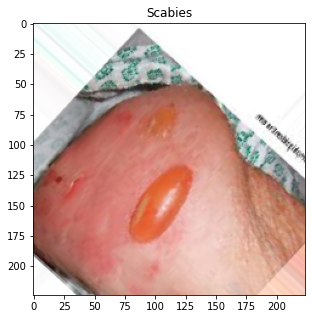

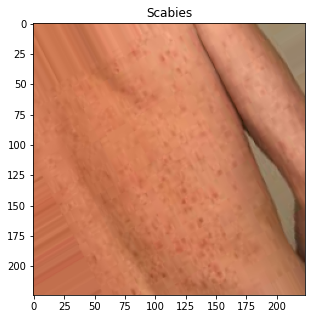

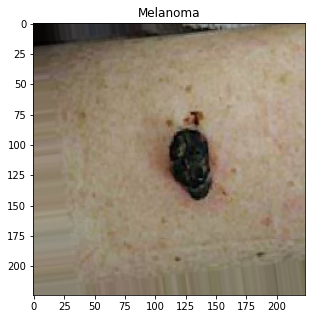

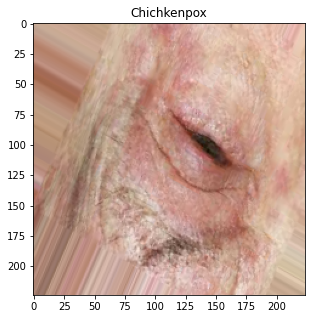

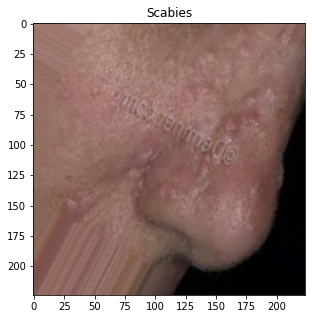

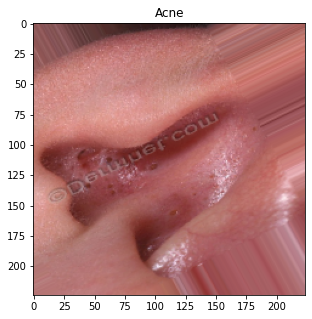

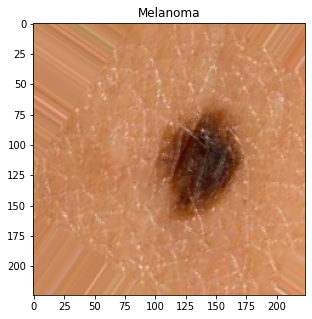

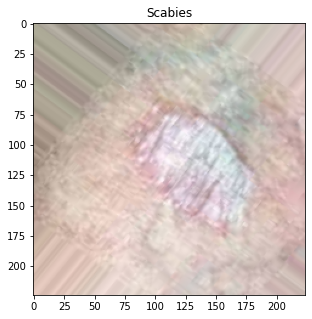

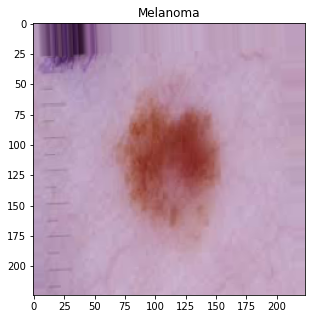

In [43]:
import numpy as np
import matplotlib.pyplot as plt

labels=[]
curr_y_train = np.argmax(y_train, axis=1)
# ['Acne', 'Chickenpox', 'Melanoma', 'Scabies']
for label in curr_y_train:
  if label == 0:
    labels.append('Acne')
  elif label == 1:
    labels.append('Chichkenpox')
  elif label == 2:
    labels.append('Melanoma')
  else:
    labels.append('Scabies')



for idx in range(0,10):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_train[idx])
    plt.title(labels[idx])

# Build the Model

## Define Callbacks for Training Proces

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
import datetime
# Define Callbacks

## Callbacks when accuracy got 93% or above, the model will stop early
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.93 and logs.get('val_accuracy') >= 0.93) and (logs.get('loss')<= 0.3 and logs.get('val_loss') <= 0.3):
            if logs.get('accuracy') <= logs.get('val_accuracy'):
                self.model.stop_training = True
            else:
                self.model.stop_training = False

## This function is for adjust the learning rate using exponential_decay
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 **(epoch/s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)
custom_cb = CustomCallback()
# Define checkp point

checkpoint_cb = ModelCheckpoint("current_best_model.h5", saved_best_only=True)
early_stop_cb = EarlyStopping(patience=10, restore_best_weights= True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/ 

callbacks = [custom_cb, checkpoint_cb, early_stop_cb, lr_scheduler, tensorboard_callback]


In [47]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [58]:
# Define xception based Model using 224, 224 input image and pooling max
xception_based_model = Xception(weights='imagenet', input_shape=(224, 224 ,3), include_top=False, pooling='max')
x = xception_based_model.output

# Define the MLP for classification
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(4, activation='softmax')(x)

# Define the model
model = Model(inputs=xception_based_model.input, outputs = predictions)

# freeze all layer in xception_based_model for training process,
for layer in xception_based_model.layers:
  layer.trainable = False
optimizer=Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [59]:
# Trains for 4 epochs
hist = model.fit(train_set, epochs=4, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

Epoch 1/4
44/44 [==============================] - 46s 976ms/step - loss: 7.2601 - accuracy: 0.5249 - val_loss: 7.8069 - val_accuracy: 0.5449
Epoch 2/4
44/44 [==============================] - 40s 917ms/step - loss: 5.4161 - accuracy: 0.6815 - val_loss: 3.5480 - val_accuracy: 0.5615
Epoch 3/4
44/44 [==============================] - 41s 928ms/step - loss: 2.8442 - accuracy: 0.7136 - val_loss: 2.0828 - val_accuracy: 0.6844
Epoch 4/4
44/44 [==============================] - 41s 924ms/step - loss: 1.9930 - accuracy: 0.6794 - val_loss: 1.7829 - val_accuracy: 0.6246


In [61]:
# Evaluate the current model

print('Loss of the model is - ', model.evaluate(X_test, y_test)[0])
print('Accuracy of the model is - ', model.evaluate(X_test, y_test)[1]*100, '%')

predict = model.predict(X_test)
# print(predict)
predict = np.argmax(predict, axis=1)
predict = predict.reshape(1, -1)[0]

curr_y_test = np.argmax(y_test, axis=1)


from sklearn.metrics import classification_report

print(classification_report(curr_y_test, predict, target_names =['Acne', 'Chickenpox', 'Melanoma', 'Scabies']))

2/2 [==============================] - 0s 122ms/step - loss: 1.9270 - accuracy: 0.6250
Loss of the model is -  1.9270278215408325
2/2 [==============================] - 0s 125ms/step - loss: 1.9270 - accuracy: 0.6250
Accuracy of the model is -  62.5 %
              precision    recall  f1-score   support

        Acne       0.52      0.69      0.59        16
  Chickenpox       0.61      0.65      0.63        17
    Melanoma       0.64      0.88      0.74         8
     Scabies       0.79      0.48      0.59        23

    accuracy                           0.62        64
   macro avg       0.64      0.67      0.64        64
weighted avg       0.66      0.62      0.62        64



In [62]:

optimizer=Adam()

# unfreeze last 10 layers and include them in training process
for layer in xception_based_model.layers[-10:]:
  layer.trainable=True
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [63]:
# Retrain the model with 100 epochs
hist = model.fit(train_set, epochs=100, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

Epoch 1/100
44/44 [==============================] - 46s 986ms/step - loss: 3.0711 - accuracy: 0.6261 - val_loss: 12.1823 - val_accuracy: 0.4718
Epoch 2/100
44/44 [==============================] - 41s 931ms/step - loss: 2.1356 - accuracy: 0.7603 - val_loss: 2.5698 - val_accuracy: 0.6711
Epoch 3/100
44/44 [==============================] - 41s 938ms/step - loss: 1.3287 - accuracy: 0.7800 - val_loss: 1.7457 - val_accuracy: 0.5914
Epoch 4/100
44/44 [==============================] - 41s 939ms/step - loss: 0.9445 - accuracy: 0.8114 - val_loss: 1.0596 - val_accuracy: 0.7176
Epoch 5/100
44/44 [==============================] - 42s 939ms/step - loss: 0.7911 - accuracy: 0.8300 - val_loss: 1.0003 - val_accuracy: 0.7508
Epoch 6/100
44/44 [==============================] - 41s 932ms/step - loss: 0.6999 - accuracy: 0.8309 - val_loss: 0.9103 - val_accuracy: 0.7442
Epoch 7/100
44/44 [==============================] - 41s 933ms/step - loss: 0.6094 - accuracy: 0.8552 - val_loss: 1.1272 - val_accuracy

# Evaluate Model

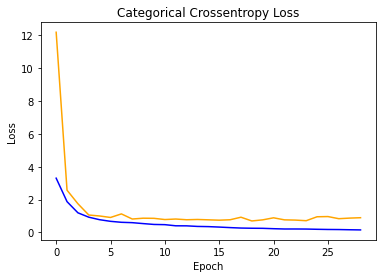

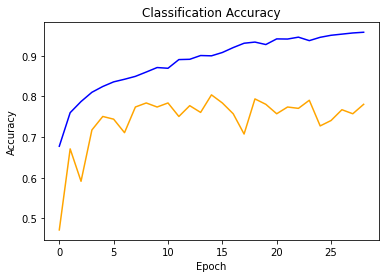

In [66]:
import seaborn as sns
def plot_hist(hist):
  plt.title('Categorical Crossentropy Loss')
  plt.plot(hist.history['loss'], color ='blue', label='train')
  plt.plot(hist.history['val_loss'], color ='orange', label='val')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()

  plt.title('Classification Accuracy')
  plt.plot(hist.history['accuracy'], color='blue', label='train')
  plt.plot(hist.history['val_accuracy'], color='orange', label='test')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

plot_hist(hist)

2/2 [==============================] - 0s 141ms/step - loss: 0.5559 - accuracy: 0.8750
Loss of the model is -  0.5559225678443909
2/2 [==============================] - 0s 117ms/step - loss: 0.5559 - accuracy: 0.8750
Accuracy of the model is -  87.5 %
              precision    recall  f1-score   support

        Acne       0.88      0.94      0.91        16
  Chickenpox       0.93      0.82      0.87        17
    Melanoma       0.73      1.00      0.84         8
     Scabies       0.90      0.83      0.86        23

    accuracy                           0.88        64
   macro avg       0.86      0.90      0.87        64
weighted avg       0.88      0.88      0.88        64

[[15  1  0  0]
 [ 0 14  1  2]
 [ 0  0  8  0]
 [ 2  0  2 19]]


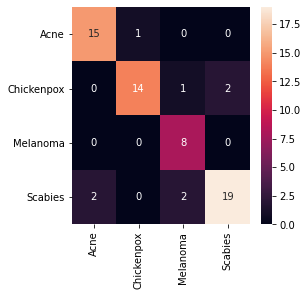

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def evaluate_model(model, y_test):
  print('Loss of the model is - ', model.evaluate(X_test, y_test)[0])
  print('Accuracy of the model is - ', model.evaluate(X_test, y_test)[1]*100, '%')
  predict = model.predict(X_test)
  # print(predict)
  predict = np.argmax(predict, axis=1)
  predict = predict.reshape(1, -1)[0]
  curr_y_test = np.argmax(y_test, axis=1)
  print(classification_report(curr_y_test, predict, target_names =['Acne', 'Chickenpox', 'Melanoma', 'Scabies']))

  conf_matrix = confusion_matrix(curr_y_test, predict)
  print(conf_matrix)
  df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Acne', 'Chickenpox', 'Melanoma', 'Scabies')],
                  columns = [i for i in ('Acne', 'Chickenpox', 'Melanoma', 'Scabies')])
  plt.figure(figsize = (4, 4))
  sns.heatmap(df_cm, annot=True)

evaluate_model(model, y_test)

# Save Model

In [72]:
evaluate_model(model, y_test)

model.save('/content/gdrive/MyDrive/model/kikuma_model.h5')

2/2 [==============================] - 0s 158ms/step - loss: 0.5559 - accuracy: 0.8750
Loss of the model is -  0.5559225678443909
2/2 [==============================] - 0s 122ms/step - loss: 0.5559 - accuracy: 0.8750
Accuracy of the model is -  87.5 %
              precision    recall  f1-score   support

        Acne       0.88      0.94      0.91        16
  Chickenpox       0.93      0.82      0.87        17
    Melanoma       0.73      1.00      0.84         8
     Scabies       0.90      0.83      0.86        23

    accuracy                           0.88        64
   macro avg       0.86      0.90      0.87        64
weighted avg       0.88      0.88      0.88        64



In [73]:
model.save('/content/gdrive/MyDrive/model/kikuma_model/')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/kikuma_model/assets


# Load Best Model

2/2 [==============================] - 1s 122ms/step - loss: 0.6002 - accuracy: 0.7969
Loss of the model is -  0.6002187132835388
2/2 [==============================] - 0s 124ms/step - loss: 0.6002 - accuracy: 0.7969
Accuracy of the model is -  79.6875 %
              precision    recall  f1-score   support

        Acne       0.71      0.94      0.81        16
  Chickenpox       0.76      0.76      0.76        17
    Melanoma       1.00      0.88      0.93         8
     Scabies       0.84      0.70      0.76        23

    accuracy                           0.80        64
   macro avg       0.83      0.82      0.82        64
weighted avg       0.81      0.80      0.80        64

[[15  1  0  0]
 [ 2 13  0  2]
 [ 0  0  7  1]
 [ 4  3  0 16]]


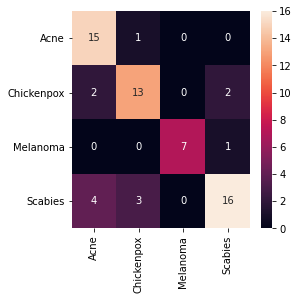

In [78]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/current_best_model.h5')
evaluate_model(best_model, y_test)

In [80]:
best_model.save('/content/gdrive/MyDrive/model/current_best_model/paling baru/best_model.h5')
best_model.save('/content/gdrive/MyDrive/model/current_best_model/paling baru/')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/current_best_model/paling baru/assets
